In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Telco_Customer_Churn_Dataset .csv')

In [ ]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

### ***Binary Encoding***

In [ ]:
import category_encoders as ce
binary_encoder = ce.BinaryEncoder(cols=['gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'])
df_encoded = binary_encoder.fit_transform(df)
print(df_encoded.head)

<bound method NDFrame.head of       customerID  gender_0  gender_1  SeniorCitizen  Partner_0  Partner_1  \
0     7590-VHVEG         0         1              0          0          1   
1     5575-GNVDE         1         0              0          1          0   
2     3668-QPYBK         1         0              0          1          0   
3     7795-CFOCW         1         0              0          1          0   
4     9237-HQITU         0         1              0          1          0   
...          ...       ...       ...            ...        ...        ...   
7038  6840-RESVB         1         0              0          0          1   
7039  2234-XADUH         0         1              0          0          1   
7040  4801-JZAZL         0         1              0          0          1   
7041  8361-LTMKD         1         0              1          0          1   
7042  3186-AJIEK         1         0              0          1          0   

      Dependents_0  Dependents_1  tenure  Pho

In [ ]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7043 non-null   object 
 1   gender_0            7043 non-null   int64  
 2   gender_1            7043 non-null   int64  
 3   SeniorCitizen       7043 non-null   int64  
 4   Partner_0           7043 non-null   int64  
 5   Partner_1           7043 non-null   int64  
 6   Dependents_0        7043 non-null   int64  
 7   Dependents_1        7043 non-null   int64  
 8   tenure              7043 non-null   int64  
 9   PhoneService_0      7043 non-null   int64  
 10  PhoneService_1      7043 non-null   int64  
 11  MultipleLines_0     7043 non-null   int64  
 12  MultipleLines_1     7043 non-null   int64  
 13  InternetService_0   7043 non-null   int64  
 14  InternetService_1   7043 non-null   int64  
 15  OnlineSecurity_0    7043 non-null   int64  
 16  Online

###***Calculating the churn rate***

In [ ]:
count_churn = df['Churn'].value_counts()
churn_rate = (count_churn['Yes'] / (count_churn['Yes'] + count_churn['No'])) * 100.00
print(churn_rate)

26.536987079369588


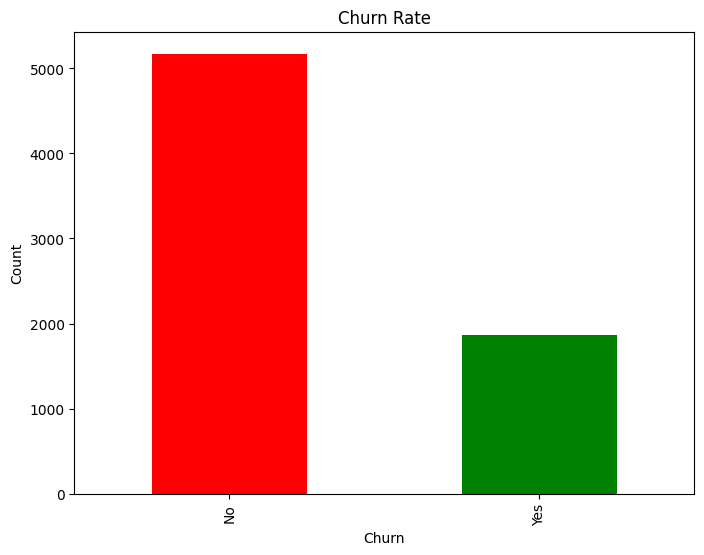

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
count_churn.plot(kind='bar',color=['Red','Green'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Rate')
plt.show()

##**Analysing the demographics**

In [ ]:
df_encoded.describe()

,gender_0,gender_1,SeniorCitizen,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,PhoneService_1,...,Contract_0,Contract_1,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,Churn_0,Churn_1
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.495244,0.162147,0.516967,0.483033,0.299588,0.700412,32.371149,0.903166,0.096834,...,0.449808,0.790856,0.407781,0.592219,0.216101,0.448105,0.555019,64.761692,0.265370,0.734630
std,0.500013,0.500013,0.368612,0.499748,0.499748,0.458110,0.458110,24.559481,0.295752,0.295752,...,0.497510,0.406726,0.491457,0.491457,0.411613,0.497335,0.496999,30.090047,0.441561,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,70.350000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,55.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,89.850000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,1.000000,1.000000


In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [ ]:
demographic_features  = ['gender','SeniorCitizen','Partner','Dependents']
# Perform Chi-Square test for each demographic feature
for feature in demographic_features:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-Square Test for {feature} vs Churn: p-value = {p}')


Chi-Square Test for gender vs Churn: p-value = 0.48657873605618596
Chi-Square Test for SeniorCitizen vs Churn: p-value = 1.510066805092378e-36
Chi-Square Test for Partner vs Churn: p-value = 2.1399113440759935e-36
Chi-Square Test for Dependents vs Churn: p-value = 4.9249216612154196e-43


###***PointPlot***

<ipython-input-12-202b6a3e337d>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df_long, x='Category', y='Churn', hue='Feature', dodge=True, join=False)


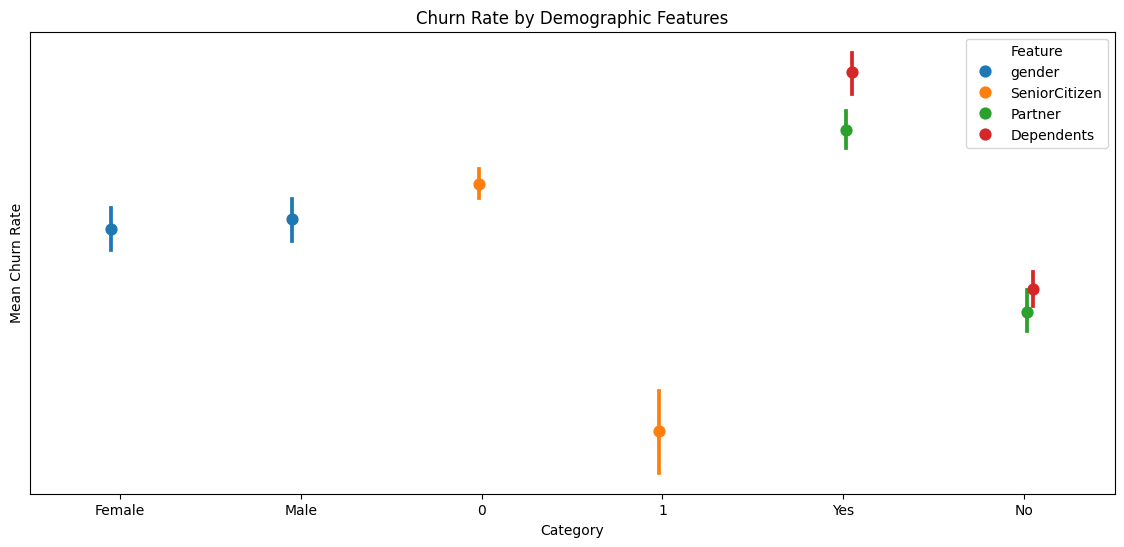

In [ ]:
# Create a long-form DataFrame for easier plotting
df_long = df.melt(id_vars='Churn', value_vars=demographic_features,
                  var_name='Feature', value_name='Category')

# Create a point plot to show the mean churn rate for each category
plt.figure(figsize=(14, 6))
sns.pointplot(data=df_long, x='Category', y='Churn', hue='Feature', dodge=True, join=False)
plt.title('Churn Rate by Demographic Features')
plt.xlabel('Category')
plt.ylabel('Mean Churn Rate')
plt.legend(title='Feature')
plt.show()

###***Tenure Distribution***


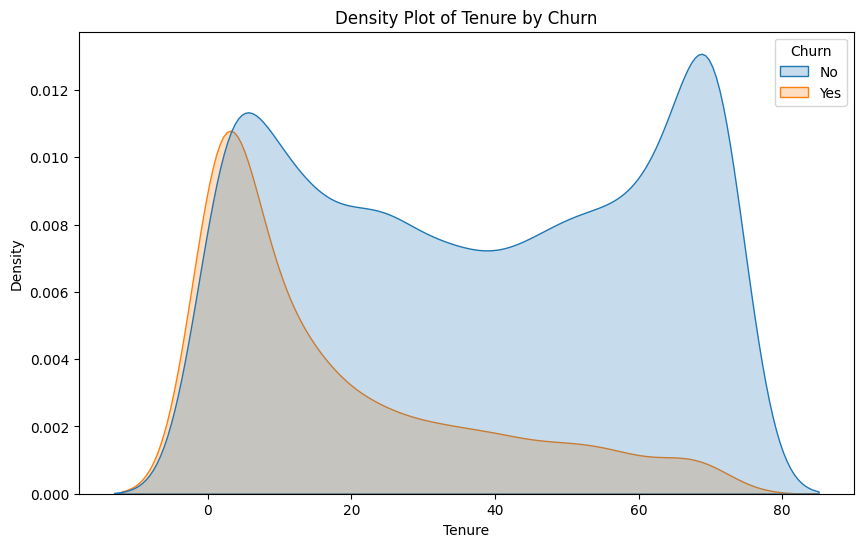

In [ ]:
#Density plot for tenure to find where the customers lie on tenure
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True)
plt.title('Density Plot of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.show()

###***Relation between Churn and Payment methods***

In [ ]:
print(df['PaymentMethod'].unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


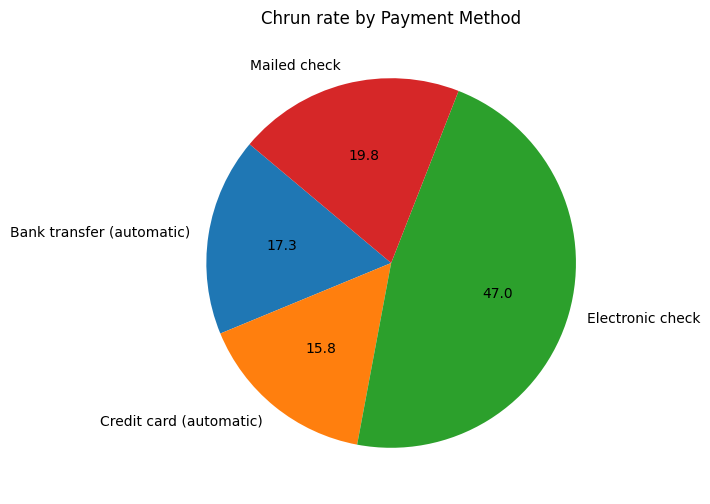

In [ ]:
#Chrun rate for each payment method
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
churn_rate_by_payment = df.groupby('PaymentMethod')['Churn'].mean() * 100
#print(churn_rate_by_payment)
plt.figure(figsize=(10,6))
churn_rate_by_payment.plot(kind='pie',autopct='%1.1f',startangle=140)
plt.title('Chrun rate by Payment Method')
plt.ylabel('')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df['PaymentMethod'], df['Churn'])
print(contingency_table)

# Perform the Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Test Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis - There is a significant association between churn and payment method.")
else:
    print("Fail to reject the null hypothesis - There is no significant association between churn and payment method.")


Churn                         0     1
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308
Chi-Square Test Statistic: 648.1423274814
p-value: 3.6823546520097993e-140
Degrees of Freedom: 3
Expected Frequencies:
[[1134.26891949  409.73108051]
 [1118.10705665  403.89294335]
 [1737.40025557  627.59974443]
 [1184.22376828  427.77623172]]
Reject the null hypothesis - There is a significant association between churn and payment method.


In [ ]:
print(df['Contract'].unique())

['Month-to-month' 'One year' 'Two year']


In [ ]:
# Map contract types to numeric values for frequency calculation
contract_mapping = {'Month-to-month': 1, 'One year': 2, 'Two year': 3}
df['Contract'] = df['Contract'].map(contract_mapping)

# Calculate the RFM scores
df['R_Score'] = pd.qcut(df['tenure'], 5, labels=range(5, 0, -1))
df['F_Score'] = pd.qcut(df['Contract'].rank(method='first'), 5, labels=range(1, 6))
df['M_Score'] = pd.qcut(df['MonthlyCharges'], 5, labels=range(1, 6))

# Combine R, F, M scores into a single RFM score
df['RFM_Score'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)

print(df[['tenure', 'MonthlyCharges', 'Contract', 'RFM_Score']].head())


   tenure  MonthlyCharges  Contract RFM_Score
0       1           29.85         1       512
1      34           56.95         2       332
2       2           53.85         1       512
3      45           42.30         2       232
4       2           70.70         1       513


In [ ]:
# Segment customers based on RFM score
def segment_customers(df):
    if df['RFM_Score'] == '555':
        return 'Champions'
    elif df['RFM_Score'].startswith('5'):
        return 'Loyal Customers'
    elif df['RFM_Score'].endswith('5'):
        return 'Big Spenders'
    elif df['RFM_Score'][0] == '1':
        return 'At Risk'
    elif df['RFM_Score'][1] == '1':
        return 'Needs Attention'
    else:
        return 'Other'

df['Segment'] = df.apply(segment_customers, axis=1)

# Print the first few rows of the dataframe with the new segment column
print(df[['RFM_Score', 'Segment']].head())


  RFM_Score          Segment
0       512  Loyal Customers
1       332            Other
2       512  Loyal Customers
3       232            Other
4       513  Loyal Customers


Segment
At Risk            0.029115
Big Spenders       0.302917
Loyal Customers    0.529372
Needs Attention    0.312966
Other              0.166855
Name: Churn, dtype: float64


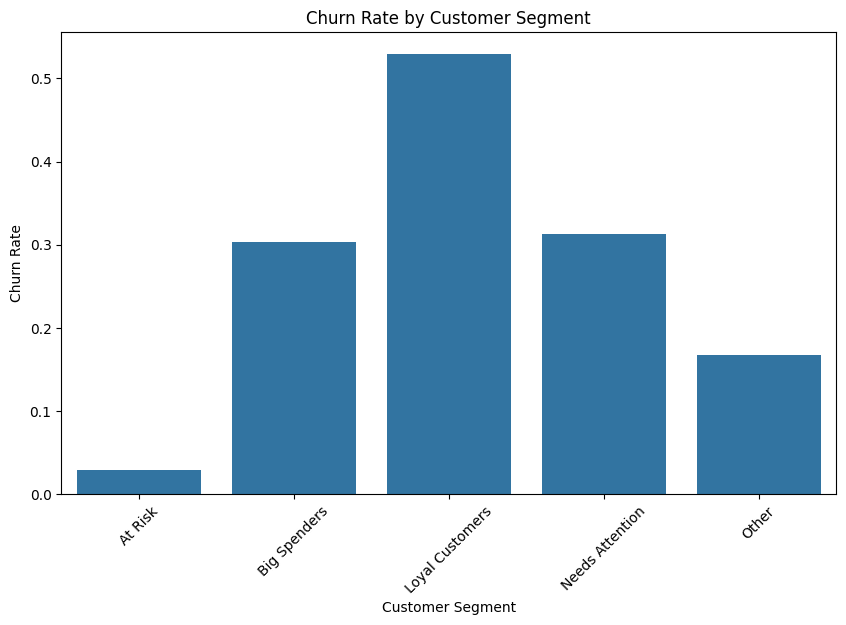

In [ ]:
# Convert 'Churn' column to binary encoding if necessary
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Calculate churn rates for each segment
churn_rate_by_segment = df.groupby('Segment')['Churn'].mean()

print(churn_rate_by_segment)

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_segment.index, y=churn_rate_by_segment.values)
plt.xlabel('Customer Segment')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Segment')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract               int64
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                  int64
R_Score             category
F_Score             category
M_Score             category
RFM_Score             object
Segment               object
dtype: object

###**Training the model**

### Feature Selection

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import statsmodels.api as sm
import pandas as pd # Import pandas for data manipulation

# Assuming 'df_encoded' is your DataFrame
x = df_encoded.drop(['Churn_0', 'Churn_1'], axis=1)
y = df_encoded['Churn_1']

# Identify and handle non-numeric columns
non_numeric_cols = x.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols) # Check which columns are non-numeric

# Option 1: Drop non-numeric columns (if they are not crucial)
x_numeric = x.drop(non_numeric_cols, axis=1)

# Option 2: Convert non-numeric columns (if they contain useful information)
# Example: If 'customerID' is non-numeric and needs conversion
# x['customerID'] = x['customerID'].astype(int) # Or any suitable conversion

# Proceed with the model after handling non-numeric columns
x_numeric = sm.add_constant(x_numeric) # Add constant to the numeric DataFrame
logit_model = sm.Logit(y, x_numeric).fit()
print(logit_model.pvalues)
Significant_features = logit_model.pvalues[logit_model.pvalues < 0.05].index.tolist()

if 'const' in Significant_features:
    Significant_features.remove('const')

x_new = x_numeric[Significant_features] # Select features from the numeric DataFrame

Non-numeric columns: Index(['customerID', 'TotalCharges'], dtype='object')
         Current function value: 0.415374
         Iterations: 35
const                 9.999980e-01
gender_0              9.999998e-01
gender_1              9.999999e-01
SeniorCitizen         1.060272e-02
Partner_0                      NaN
Partner_1                      NaN
Dependents_0          9.999996e-01
Dependents_1          9.999994e-01
tenure                2.789016e-47
PhoneService_0                 NaN
PhoneService_1        9.999995e-01
MultipleLines_0                NaN
MultipleLines_1       9.344484e-03
InternetService_0              NaN
InternetService_1              NaN
OnlineSecurity_0      9.999999e-01
OnlineSecurity_1      9.999999e-01
OnlineBackup_0                 NaN
OnlineBackup_1                 NaN
DeviceProtection_0             NaN
DeviceProtection_1             NaN
TechSupport_0         9.999999e-01
TechSupport_1         9.999999e-01
StreamingTV_0                  NaN
StreamingTV_1      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Accuracy: 0.7814052519517388
Precision: 0.8204225352112676
Recall: 0.8996138996138996
F1 Score: 0.8581952117863719
AUC-ROC: 0.6763485047667352


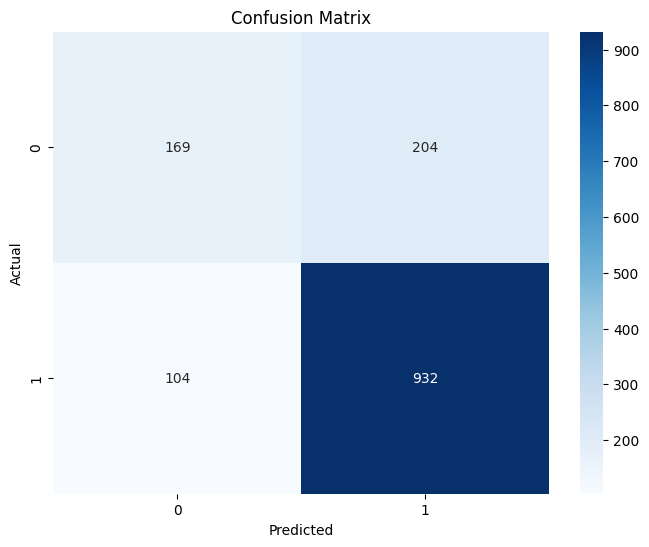

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
# Preprocessing pipeline (if needed)
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Logistic Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()